In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/co2-mm-mlo.csv",index_col='Date', parse_dates=["Date"])
df.asfreq("MS")

In [95]:
df.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-01-03,1958.208,315.71,315.71,314.62,-1
1958-01-04,1958.292,317.45,317.45,315.29,-1
1958-01-05,1958.375,317.50,317.50,314.71,-1
1958-01-06,1958.458,-99.99,317.10,314.85,-1
1958-01-07,1958.542,315.86,315.86,314.98,-1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-01-03 to 2016-01-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Decimal Date    706 non-null    float64
 1   Average         706 non-null    float64
 2   Interpolated    706 non-null    float64
 3   Trend           706 non-null    float64
 4   Number of Days  706 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 53.1 KB


In [97]:
df.isna().sum()

Decimal Date      0
Average           0
Interpolated      0
Trend             0
Number of Days    0
dtype: int64

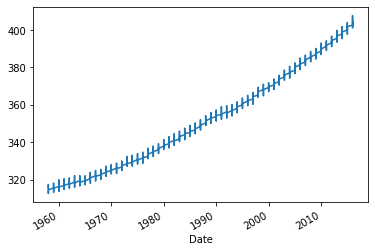

In [107]:
df["Interpolated"].plot()

In [ ]:
pip install pmdarima

In [77]:
from pmdarima import auto_arima

In [78]:
auto_arima = auto_arima(df['Interpolated'],error_action='ignore',seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=479.217, Time=3.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2290.715, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1552.865, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2296.126, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=3.54 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=733.571, Time=4.03 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=480.751, Time=10.46 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=530.227, Time=9.83 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1387.127, Time=1.08 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=9.45 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=583.680, Time=11.95 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=474.238, Time=11.89 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=433.264, Time=10.60 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   

In [79]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  706
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -203.639
Date:                                 Mon, 05 Jul 2021   AIC                            423.278
Time:                                         10:57:41   BIC                            459.744
Sample:                                              0   HQIC                           437.369
                                                 - 706                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.024e-05      0.000      0.613      0.540      -0.000       0.000
ar.L1          0.4006      0.077      5.236      0.000       0.251       0.551
ma.L1         -0.7061      0.058    -12.142      0.000      -0.820      -0.592
ar.S.L12       0.2308      0.190      1.217      0.224      -0.141       0.602
ar.S.L24       0.7682      0.190      4.052      0.000       0.397       1.140
ma.S.L12      -0.0764      0.185     -0.413      0.679      -0.439       0.286
ma.S.L24      -0.6736      0.160     -4.219      0.000      -0.987      -0.361
sigma2         0.0971      0.005     20.076      0.000       0.088       0.107
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                 5.49
Prob(Q):                              0.16   Prob(JB):                         0.06
Heteroskedasticity (H):               1.16   Skew:                             0.05
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
model=SARIMAX(df['Interpolated'],order=(1,1,1),seasonal_order=(2,0,2,12)).fit(disp=0)
ypred = model.predict()

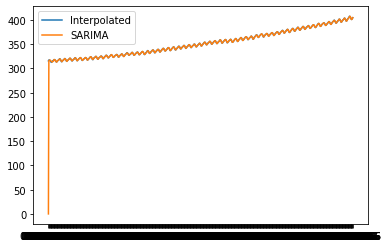

In [86]:
plt.plot(df["Interpolated"],label="Interpolated")
plt.plot(ypred,label="SARIMA")
plt.legend()